In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

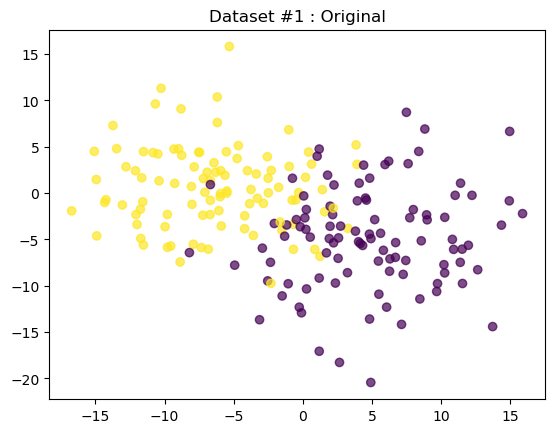

In [5]:
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std =5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

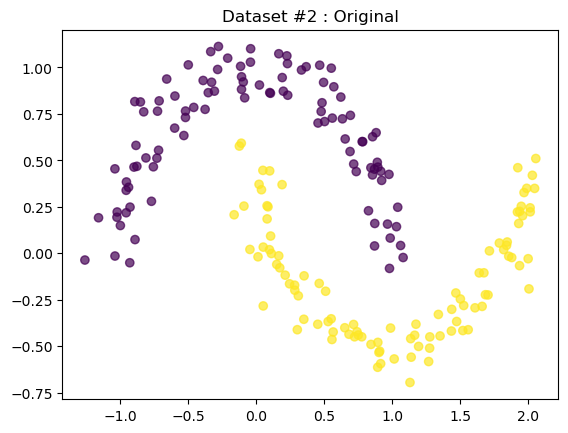

In [13]:
X2, label2 = make_moons(n_samples=200, noise=0.09, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

D:\Program\Anacoda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


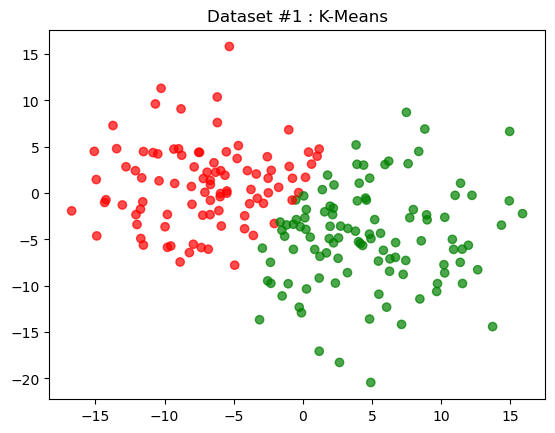

In [15]:
kmeans = KMeans(n_clusters=2,random_state=123) 
kmeans.fit(X1) 
myColors = {0:'red',1:'green'} 
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x:myColors[x]), alpha=0.7 )
plt.title('Dataset #1 : K-Means')
plt.show()


D:\Program\Anacoda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


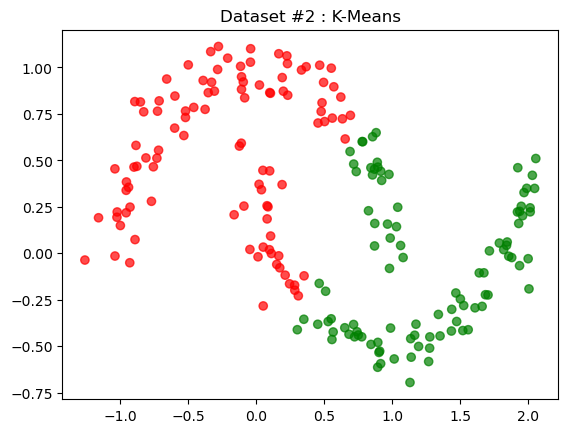

In [17]:
kmeans = KMeans(n_clusters=2,random_state=123)
kmeans.fit(X2)
myColors = {0:'red',1:'green'} 
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x:myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : K-Means')
plt.show()

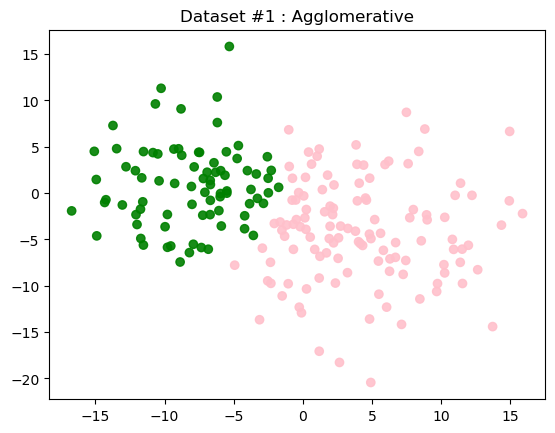

In [29]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'pink',1:'green'}
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x:myColors[x]), alpha=0.9 )
plt.title('Dataset #1 : Agglomerative')
plt.show()

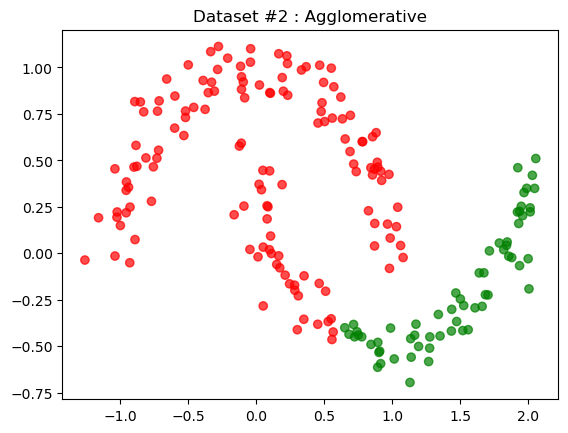

In [31]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'red',1:'green'}
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x:myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : Agglomerative')
plt.show()


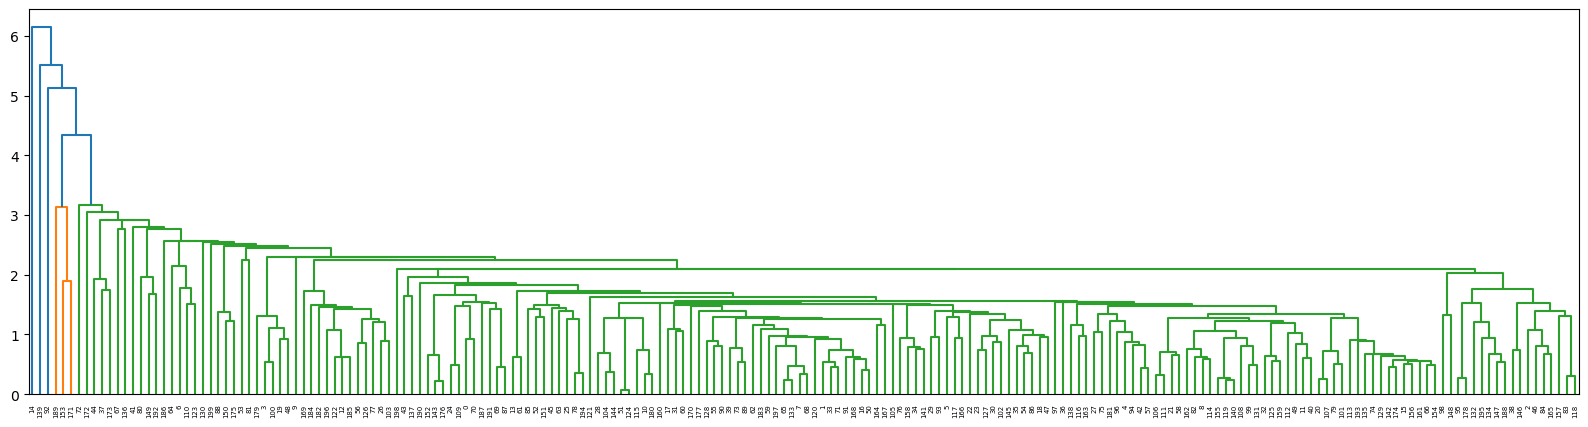

In [33]:
myLinkage = linkage(X1,method='single') 
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [35]:
labels = fcluster(myLinkage, 5, criterion='distance')
pd.Series(labels).value_counts()

1    197
4      1
2      1
3      1
Name: count, dtype: int64

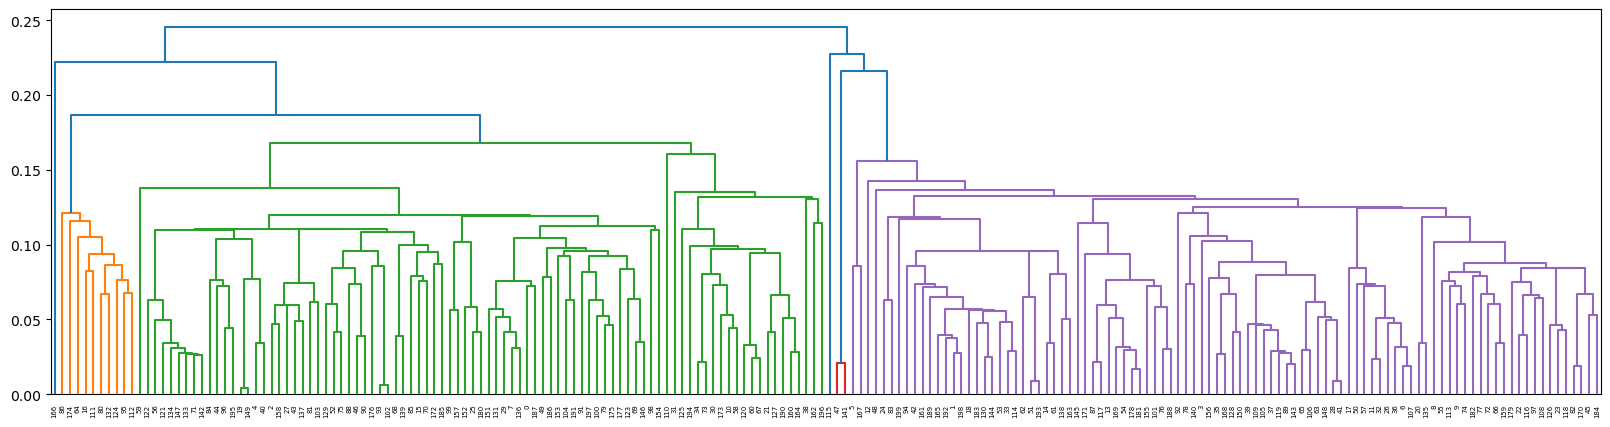

In [37]:
myLinkage = linkage(X2,method='single')
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [39]:
labels = fcluster(myLinkage, 0.23, criterion='distance') 
pd.Series(labels).value_counts()


1    100
2    100
Name: count, dtype: int64

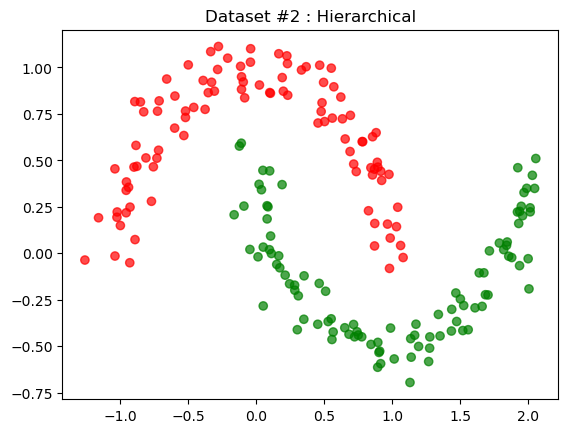

In [41]:
myColors = {1:'red',2:'green'}
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]),alpha=0.7 )
plt.title('Dataset #2 : Hierarchical')
plt.show()

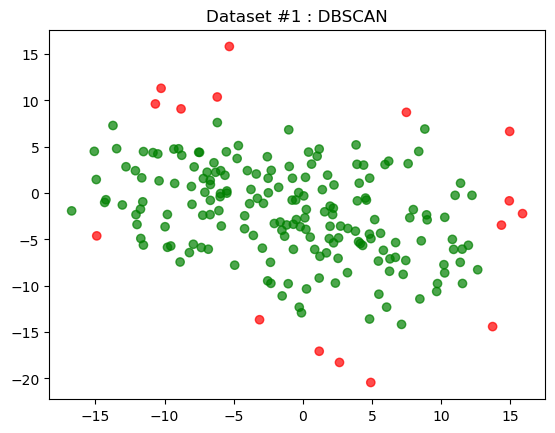

In [43]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'red',0:'green',1:'blue'} 
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x:myColors[x]), alpha=0.7 )
plt.title('Dataset #1 : DBSCAN')
plt.show()

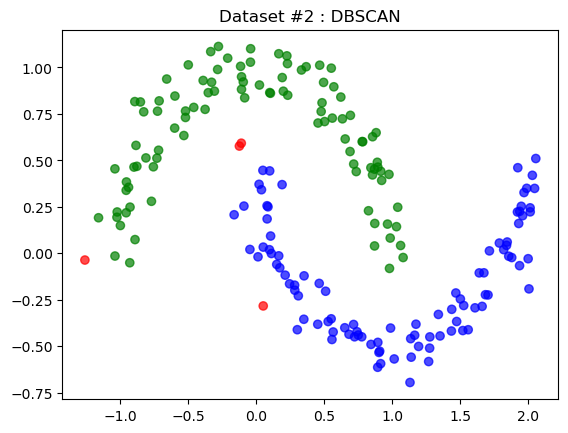

In [45]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x:myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : DBSCAN')
plt.show()
